# Latar Belakang
Seorang *youtuber* mempekerjakan seorang *data analyst* untuk memberikan *insight* agar video-video yang dibuat oleh channelnya menjadi trending.

## Pernyataan Masalah
*Youtuber* tersebut ingin mengetahui **apa saja faktor yang mempengaruhi sebuah video menjadi trending di US**. Informasi ini akan membantu *youtuber*  tersebut untuk menyesuaikan tipe konten yang akan dibuatnya sehingga biaya produksi menjadi efektif dan tepat sasaran.

Sebagai seorang *data analyst*, saya akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik video yang harus dibuat agar video tersebut menjadi trending di Youtube US?**
1. Apa faktor utama yang membuat sebuah video menjadi trending?
2. Apakah jam tayang video mempengaruhi performa video untuk menjadi trending?
3. Berapa lama waktu yang dibutuhkan agar sebuah video menjadi video yang trending?
4. Kategori apa yang paling diminati penonton pada video yang trending?

# Data
Dataset yang digunakan untuk menganalisa video Youtube yang trending di US dapat diakses [di sini](https://www.kaggle.com/datasets/datasnaek/youtube-new). Dataset tersebut merupakan dataset yang berisi data selama beberapa bulan tentang video Youtube yang sedang *trend* setiap harinya di wilayah US.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait karakteristik dari setiap video yang trending di US. Terdapat 16 kolom pada dataset USvideos, yaitu:  

* video_id: ID dari setiap video
* trending_date: Tanggal video tersebut trending
* title: Judul video
* channel_title: Nama channel dari video tersebut
* category_id: Kategori dari video tersebut
* publish_time: Waktu video ditayangkan
* tags: Tags yang digunakan pemilik channel
* views: Jumlah penonton pada video tersebut
* likes: Jumlah like pada video tersebut
* dislikes: Jumlah dislike pada video tersebut
* comment_count: Jumlah komentar pada video tersebut
* thumbnail_link: Link ke thumbnail video
* comments_disabled: Apakah komentar diaktifkan atau tidak
* ratings_disabled: Apakah video tersebut termasuk ke dalam rating atau tidak
* video_error_or_removed: Apakah video tersebut pernah dihapus atau tidak
* description: Deskripsi dari video tersebut


Berikut 5 baris teratas dan terbawah dari dataset USvideos.

In [2]:
df = pd.read_csv('USvideos.csv')
display(df.head(),df.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


## Data Understanding and Cleaning

In [3]:
print(f'Jumlah baris dan kolom pada dataset USvideos adalah {df.shape}')
df.info()

Jumlah baris dan kolom pada dataset USvideos adalah (40949, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bo

In [4]:
display(df.describe(), df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [5]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   video_id                6351               
1   trending_date           205                
2   title                   6455               
3   channel_title           2207               
4   category_id             16                 
5   publish_time            6269               
6   tags                    6055               
7   views                   40478              
8   likes                   29850              
9   dislikes                8516               
10  comment_count           13773              
11  thumbnail_link          6352               
12  comments_disabled       2                  
13  ratings_disabled        2                  
14  video_error_or_removed  2                  
15  description             6901               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Missing Value

In [6]:
#Mendeteksi missing value pada tiap kolom
df.isna().sum()

video_id                  0  
trending_date             0  
title                     0  
channel_title             0  
category_id               0  
publish_time              0  
tags                      0  
views                     0  
likes                     0  
dislikes                  0  
comment_count             0  
thumbnail_link            0  
comments_disabled         0  
ratings_disabled          0  
video_error_or_removed    0  
description               570
dtype: int64

In [7]:
df[df['description'].isna()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,18.10.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40325,1h7KV2sjUWY,18.11.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40538,1h7KV2sjUWY,18.12.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40739,1h7KV2sjUWY,18.13.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1034480,59090,379,3927,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


Pada kolom `tags` terdapat string berupa '[none]' sehingga tidak terdeteksi sebagai NaN

In [8]:
df[df['tags'] == '[none]'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
97,xfmipNU4Odc,17.14.11,Edna's registered owner thought she was dead for 2 years!!!,Hope For Paws - Official Rescue Channel,15,2017-11-10T18:02:04.000Z,[none],284666,16396,81,949,https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg,False,False,False,Please donate $5 and help us save more lives:\nhttp://www.HopeForPaws.org\nThank you Doggies 911 for finding her an amazing home :-)\nhttp://www.doggies911rescue.org
133,X7flefV8tec,17.14.11,"President Bill Clinton On Dictators, Democracy, & Why We Need Immigrants More Than Ever",Team Coco,24,2017-11-09T02:37:49.000Z,[none],366180,4364,4448,1997,https://i.ytimg.com/vi/X7flefV8tec/default.jpg,False,False,False,"#ConanNYC Highlight: President Clinton talks about how much America has changed in the 25 years since he was elected the 42nd President of the United States.\n\nMore CONAN @ http://teamcoco.com/video\n\nTeam Coco is the official YouTube channel of late night host Conan O'Brien, CONAN on TBS & TeamCoco.com. Subscribe now to be updated on the latest videos: http://bit.ly/W5wt5D\n\nFor Full Episodes of CONAN on TBS, visit http://teamcoco.com/video\n\nGet Social With Team Coco:\nOn Facebook: https://www.facebook.com/TeamCoco\nOn Google+: https://plus.google.com/+TeamCoco/\nOn Twitter: http://twitter.com/TeamCoco\nOn Tumblr: http://teamcoco.tumblr.com\nOn YouTube: http://youtube.com/teamcoco\n\nFollow Conan O'Brien on Twitter: http://twitter.com/ConanOBrien"
136,5x1FAiIq_pQ,17.14.11,Alicia Keys - When You Were Gone,Alicia Keys,10,2017-11-09T15:49:21.000Z,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,"Find out more in The Vault: http://bit.ly/AK_AsIAm10\nCelebrating the anniversary of one of my favorite albums “As I Am”!! 🎉🎉🎉 “When You Were Gone” is one of the VERY first songs recorded for As I Am, the one where I started to create the sound that the album has. We were experimenting with a lot of keyboards and sounds and styles of recording, and we were all about breaking boundaries and writing things in new ways."
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [9]:
#Mengubah '[none]' menjadi NaN

df['tags'] = np.where(df['tags'] == '[none]', np.nan, df['tags'])
df['tags'].head()

0    SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1    last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"                                                                                                                                                                                                                                                                                                                                                                                       
2    racist superman|"rudy"|"mancu

In [10]:
#Pengecekan ulang '[none]'

df[df['tags'] == '[none]'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


In [11]:
#Pengecekan ulang missing value pada tiap kolom
df.isna().sum()

video_id                  0   
trending_date             0   
title                     0   
channel_title             0   
category_id               0   
publish_time              0   
tags                      1535
views                     0   
likes                     0   
dislikes                  0   
comment_count             0   
thumbnail_link            0   
comments_disabled         0   
ratings_disabled          0   
video_error_or_removed    0   
description               570 
dtype: int64

Setelah dilakukan pengecekan, *missing values* ditemukan pada kolom `tags` dan kolom `description`, untuk menanggulangi hal tersebut maka akan dilakukan beberapa langkah, yaitu:
1. Mengisi kolom `tags` dengan kolom `channel_title` karena hal tersebut lumrah untuk dilakukan
2. Mengisi kolom `description` dengan kolom `title` karena hal tersebut lumrah untuk dilakukan

In [12]:
#Mengisi missing values pada kolom `tags`:
df['tags'] = df['tags'].fillna(df['channel_title'])

#Mengisi missing values pada kolom `description`:
df['description']=df['description'].fillna(df['title'])

In [13]:
#Pengecekan ulang missing values:
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

Setelah dilakukan pengisian data pada kolom `tags` dan `description` dan dilakukan pengecekan ulang, sudah terbukti bahwa tidak ada lagi missing values yang ditemukan. Langkah selanjutnya adalah menambahkan kolom `category` yang didapatkan dari menyamakan kolom `category_id` yang ada pada file csv dan json.

In [14]:
#Mengakses file json
df1 = pd.read_json('US_category_id.json')
df1.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}"
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""', 'id': '17', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Sports', 'assignable': True}}"


In [15]:
#Membuat list yang berisikan `categoryID` dan `category`
categoryID = []
category = []

for i in df1.loc[:,'items']:
    categoryID.append(i['id'])
    category.append(i['snippet']['title'])

print(categoryID)
print(category)

['1', '2', '10', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']
['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [16]:
#Mengubah list menjadi data frame
df2 = pd.DataFrame({'category_id':categoryID, 'category':category})
df2['category_id'] = df2['category_id'].astype(np.int64)
df2

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [17]:
#Menggabungkan kolom `category_id`
df = pd.merge(df, df2, how = 'inner', left_on = 'category_id', right_on = 'category_id')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,Fals

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Setelah dilakukan pengecekan tipe data pada dataset USvideos, ditemukan bahwa pada kolom `trending_date` dan kolom `publish_time` data yang tersimpan masih berupa *object*, sehingga perlu diubah menjadi *datetime* agar dapat dilakukan analisa.

In [19]:
#Mengubah tipe data pada kolom `trending_date`
df['trending_date'] = df['trending_date'].str.replace('.', '/')
df['trending_date'] = pd.to_datetime(df['trending_date'], format = '%y/%d/%m')

#Mengubah tipe data pada kolom `publish_time`
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [20]:
#Pengecekan kembali tipe data pada tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

Agar dapat diketahui apakah jam tayang video mempengaruhi performa video untuk menjadi trending, maka perlu dilakukan penambahan kolom `showtimes`

In [21]:
df.insert(17, 'showtimes (hour)', df['publish_time'].dt.hour)

Agar dapat diketahui berapa lama waktu yang dibutuhkan agar sebuah video menjadi video yang trending, maka perlu dilakukan penambahan kolom `publishedDate` dan `timeToTrending`

In [22]:
df.insert(18, 'publishedDate', df['publish_time'].dt.date)
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

df['timeToTrending'] = df['trending_date'] - df['publishedDate']

In [23]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,showtimes (hour),publishedDate,timeToTrending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,17,2017-11-13,1 days
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs,6,2017-04-21,207 days
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs,15,2017-11-11,3 days
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|"

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [25]:
#Mengubah data type pada kolom `timeToTrending`

df['days'] = df['timeToTrending'].dt.days

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,showtimes (hour),publishedDate,timeToTrending,days
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,17,2017-11-13,1 days,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs,6,2017-04-21,207 days,207
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,...,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs,15,2017-11-11,3 days,3
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

Langkah selanjutnya adalah menghilangkan data yang duplikat.

In [27]:
dfNew = df.drop_duplicates()


In [28]:
#Pengecekan kembali apakah masih ada data yang duplikat

dfNew.duplicated().nunique()

1

Setelah dilakukan pengecekan, semua data yang duplikat telah dihapus.

In [29]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40901 non-null  object             
 1   trending_date           40901 non-null  datetime64[ns]     
 2   title                   40901 non-null  object             
 3   channel_title           40901 non-null  object             
 4   category_id             40901 non-null  int64              
 5   publish_time            40901 non-null  datetime64[ns, UTC]
 6   tags                    40901 non-null  object             
 7   views                   40901 non-null  int64              
 8   likes                   40901 non-null  int64              
 9   dislikes                40901 non-null  int64              
 10  comment_count           40901 non-null  int64              
 11  thumbnail_link          40901 non-null  o

## Cleaned Data
Setelah dilakukan *data cleansing*, berikut adalah informasi dari data yang sudah dibersihkan

In [30]:
listItem = []
for col in dfNew.columns :
    listItem.append([col, dfNew[col].dtype, dfNew[col].isna().sum(),
                    dfNew[col].nunique(), list(dfNew[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(dfNew.shape)
dfDesc

(40901, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,video_id,object,0,6351,"[UddlsDsoIWs, CY8E6N5Nzec]"
1,trending_date,datetime64[ns],0,205,"[2018-02-28T00:00:00.000000000, 2018-01-31T00:00:00.000000000]"
2,title,object,0,6455,"[Rudimental - These Days feat. Jess Glynne, Macklemore & Dan Caplen [Live at Abbey Road], Miss Universe Crowd Shouts 'Boo!' Not Happy with Ms. Jamaica Just 2nd Runner Up?]"
3,channel_title,object,0,2207,"[A Chick Called Albert, BBC America]"
4,category_id,int64,0,16,"[17, 15]"
5,publish_time,"datetime64[ns, UTC]",0,6269,"[2017-12-13T12:00:01.000000000, 2018-01-17T22:00:05.000000000]"
6,tags,object,0,6267,"[sharing things|""stranger things parody""|""sesame street parodies""|""sesame street parody""|""sesame street stranger things parody""|""tv show parodies""|""sesame street sharing things""|""the upside down""|""cookiegorgon""|""stranger things eleven""|""stranger things dustin""|""stranger things""|""stranger things mike""|""stranger things will""|""stranger things barb""|""millie bobby brown""|""gaten matarazzo""|""caleb mclaughlin""|""noah schnapp""|""joe keery""|""finn wolfhard""|""stranger things lucas"", thr|""the hollywood reporter""|""hollywood reporter""|""entertainment""|""hollywood""|""close up""|""interview""|""jessica chastain""|""molly's game""|""saoirse ronan""|""lady bird""|""mary j. blige""|""mudbound""|""jennifer lawrence""|""mother!""|""allison janney""|""i tonya""|""emma stone""|""battle of the sexes""|""actresses""|""actresses roundtable""|""roundtable""|""thr roundtable""|""close up with thr""|""celebrity""|""thr roundtables""|""film""|""movie""|""oscar""|""2018 roundtables""|""oscars""|""actress""|""the hollywood reporter roundtable""|""2018""|""celebrities""|""women""]"
7,views,int64,0,40478,"[128412, 1178272]"
8,likes,int64,0,29850,"[21899, 40489]"
9,dislikes,int64,0,8516,"[6, 81]"


Sebelum melakukan *data cleansing* terdapat 40949 baris data dan setelah dilakukan *data cleansing* terdapat 40901 baris data. Hal tersebut terjadi karena telah dilakukan pengisian data pada kolom yang memiliki *missing values* dan penghapusan data yang duplikat.

# Data Analysis
Karena tahapan *data cleansing* telah dilakukan maka analisa untuk mencari tau **bagaimana karakteristik video yang harus dibuat agar video tersebut menjadi trending di Youtube US** dapat dimulai.  

Analisa akan dilakukan dengan membandingkan berapa jumlah *views, likes, dislikes*, dan komentar yang dimiliki (mengacu pada laman Youtube help yang dapat diakses [di sini](https://support.google.com/youtube/answer/7239739?hl=en)), pengaruh jam tayang terhadap performa video, lama waktu yang dibutuhkan agar suatu video bisa menjadi trending, dan kategori apa yang paling diminati oleh penonton di US. 

### Pengaruh Jumlah `views`

In [31]:
#Pengecekan apakah kolom `views` terdistribusi normal

from scipy.stats import shapiro

stats, pvalue = shapiro(dfNew['views'])
if pvalue <= 0.05:
    print ('Tidak terdistribusi normal')
else:
    print ('Terdistribusi normal')

Tidak terdistribusi normal


In [32]:
#Menampilkan statistik deskriptif pada kolom `views` dan `tomeToTrending`

dfNew[['views', 'timeToTrending']].describe()

,views,timeToTrending
count,4.090100e+04,40901
mean,2.360678e+06,16 days 19:50:39.857216205
std,7.397719e+06,146 days 02:22:47.782206978
min,5.490000e+02,0 days 00:00:00
25%,2.419720e+05,3 days 00:00:00
50%,6.810640e+05,5 days 00:00:00
75%,1.821926e+06,9 days 00:00:00
max,2.252119e+08,4215 days 00:00:00


Dari statistik deskriptif tersebut dapat diketahui bahwa rata-rata yang dimiliki oleh kolom `views` adalah 2.3M dan rata-rata lama waktu yang dibutuhkan agar sebuah video menjadi trending adalah 16 hari. Tetapi terjadi anomali dimana ada video yang baru trending setelah 4215 hari di-*publish*, maka perlu dilakukan pengecekan outliers.

Text(0.5, 1.0, 'Amount of Days Boxplot')

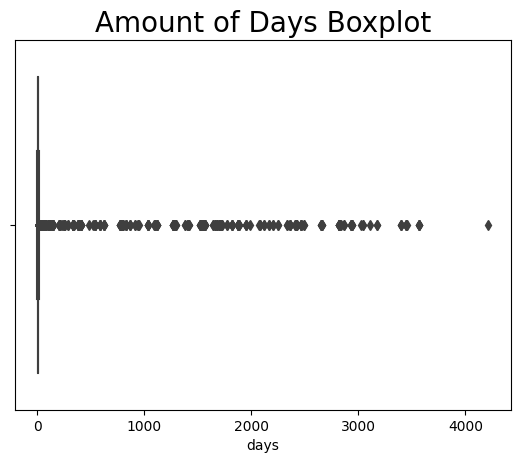

In [33]:
sns.boxplot(x = dfNew['days'])
plt.title('Amount of Days Boxplot', size = 20)

In [34]:
#Pengecekan jumlah outliers
q1 = dfNew['days'].quantile(0.25)
q3 = dfNew['days'].quantile(0.75)

IQR = q3 - q1

lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)

print('Jumlah data outliers adalah' , dfNew[dfNew['days']>upper]['days'].count())

Jumlah data outliers adalah 1584


In [35]:
#Menghapus data outliers

def removeOutlier(dfNew, days):
    q1 = dfNew['days'].quantile(0.25)
    q3 = dfNew['days'].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    filter = (dfNew['days'] >= lower) & (dfNew['days'] <= upper)
    return dfNew.loc[filter]

df3 = removeOutlier(dfNew, 'days')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39317 entries, 0 to 40939
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                39317 non-null  object             
 1   trending_date           39317 non-null  datetime64[ns]     
 2   title                   39317 non-null  object             
 3   channel_title           39317 non-null  object             
 4   category_id             39317 non-null  int64              
 5   publish_time            39317 non-null  datetime64[ns, UTC]
 6   tags                    39317 non-null  object             
 7   views                   39317 non-null  int64              
 8   likes                   39317 non-null  int64              
 9   dislikes                39317 non-null  int64              
 10  comment_count           39317 non-null  int64              
 11  thumbnail_link          39317 non-null  o

Setelah dilakukan penghapusan data outliers, dataset USvideos tersisa 39317 baris.

In [36]:
#Pengecekan statistik deskriptif untuk kolom `views` setelah dilakukan penghapusan data outliers

df3['views'].describe()

count    3.931700e+04
mean     2.175379e+06
std      6.426134e+06
min      5.490000e+02
25%      2.417110e+05
50%      6.604670e+05
75%      1.737658e+06
max      1.790453e+08
Name: views, dtype: float64

Dari statistik deskriptif yang dianalisa pada tabel baru dapat diketahui bahwa rata-rata yang dimiliki oleh kolom `views` adalah 2.17M. Dari analisa sebelumnya diketahui bahwa rata-rata sebuah video akan menjadi trending setelah periode 16 hari, oleh karena itu mari lakukan pengecekan rata-rata jumlah penonton dalam kurun waktu 0 hari hingga 16 hari.

In [37]:
amountOfViews = []

for i in range(0,17):
    avg = round(df3[df3['days'] == i]['views'].mean())
    amountOfViews.append(avg)

dfViews = pd.DataFrame(data = amountOfViews, columns = ['Average Amount of Views'])
dfViews['days'] = range(0,17)
dfViews

,Average Amount of Views,days
0,391266,0
1,804033,1
2,1140706,2
3,1321150,3
4,1474227,4
5,1632864,5
6,1901877,6
7,2390754,7
8,2792374,8
9,3086065,9


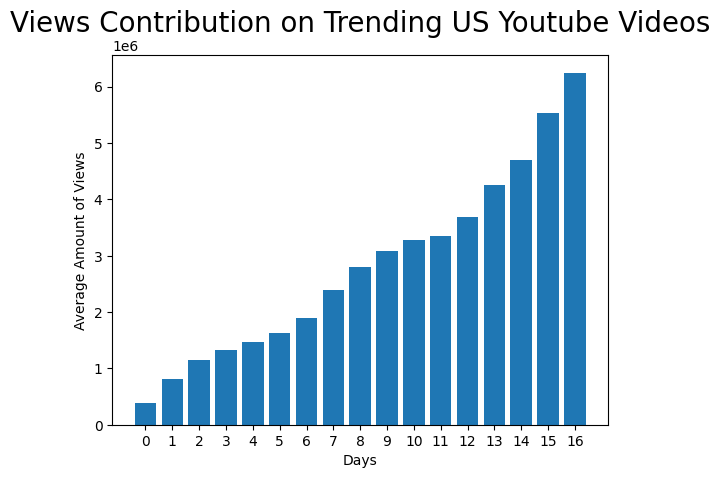

In [38]:
plt.figure()
plt.title('Views Contribution on Trending US Youtube Videos', size = 20)
plt.bar(dfViews['days'], dfViews['Average Amount of Views'])
plt.xlabel('Days')
plt.xticks(range(0,17))
plt.ylabel('Average Amount of Views')
plt.show()

Dari grafik di atas dapat disimpulkan bahwa sebuah video yang di-*upload* ke Youtube akan berpotensi menjadi video yang trending apabila jumlah `views` yang dimiliki oleh video tersebut terus bertambah setiap harinya.

### Pengaruh Jumlah `likes`

In [39]:
#Pengecekan apakah kolom `likes` terdistribusi normal

from scipy.stats import shapiro

stats, pvalue = shapiro(df3['likes'])
if pvalue <= 0.05:
    print ('Tidak terdistribusi normal')
else:
    print ('Terdistribusi normal')

Tidak terdistribusi normal


In [40]:
#Menampilkan statistik deskriptif pada kolom `likes`

df3['likes'].describe()

count    3.931700e+04
mean     7.102627e+04
std      2.176865e+05
min      0.000000e+00
25%      5.432000e+03
50%      1.755200e+04
75%      5.322600e+04
max      5.613827e+06
Name: likes, dtype: float64

Dari statistik deskriptif yang dianalisa pada tabel baru dapat diketahui bahwa rata-rata yang dimiliki oleh kolom `likes` adalah 71026.

In [41]:
amountOfLikes = []

for i in range(0,17):
    avg = round(df3[df3['days'] == i]['likes'].mean())
    amountOfLikes.append(avg)

dfLikes = pd.DataFrame(data = amountOfLikes, columns = ['Average Amount of Likes'])
dfLikes['days'] = range(0,17)
dfLikes

,Average Amount of Likes,days
0,21151,0
1,41692,1
2,48662,2
3,51454,3
4,54380,4
5,57526,5
6,63492,6
7,75975,7
8,86196,8
9,94428,9


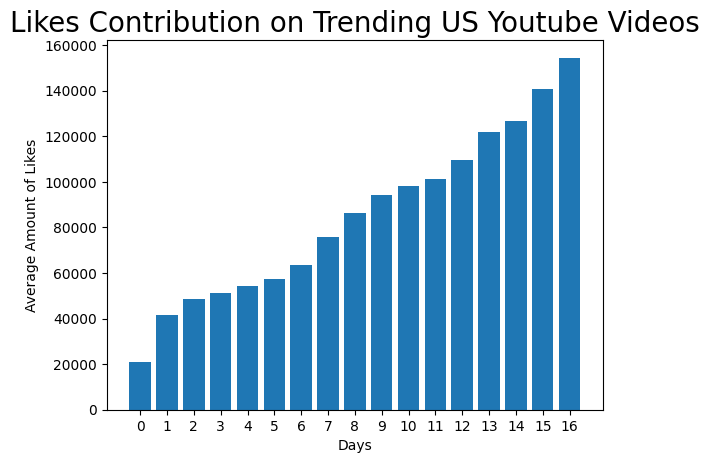

In [42]:
plt.figure()
plt.title('Likes Contribution on Trending US Youtube Videos', size = 20)
plt.bar(dfLikes['days'], dfLikes['Average Amount of Likes'])
plt.xlabel('Days')
plt.xticks(range(0,17))
plt.ylabel('Average Amount of Likes')
plt.show()

Dari grafik di atas dapat disimpulkan bahwa jumlah `likes` dari suatu video makin hari makin bertambah, hal tersebut menunjukkan apabila sebuah video memiliki banyak jumlah `likes` maka kemungkinan untuk video tersebut muncul di beranda penonton akan semakin tinggi dan hal itu membuat semakin banyak orang yang tertarik untuk menontonnya dan me-*like* video tersebut.

### Pengaruh Jumlah `dislikes`

In [43]:
#Pengecekan apakah kolom `dislikes` terdistribusi normal

from scipy.stats import shapiro

stats, pvalue = shapiro(df3['dislikes'])
if pvalue <= 0.05:
    print ('Tidak terdistribusi normal')
else:
    print ('Terdistribusi normal')

Tidak terdistribusi normal


In [44]:
#Menampilkan statistik deskriptif pada kolom `dislikes`

df3['dislikes'].describe()

count    3.931700e+04
mean     3.543856e+03
std      2.897422e+04
min      0.000000e+00
25%      2.020000e+02
50%      6.180000e+02
75%      1.861000e+03
max      1.674420e+06
Name: dislikes, dtype: float64

Dari statistik deskriptif yang dianalisa pada tabel baru dapat diketahui bahwa rata-rata yang dimiliki oleh kolom `dislikes` adalah 3543.

In [45]:
amountOfDislikes = []

for i in range(0,17):
    avg = round(df3[df3['days'] == i]['dislikes'].mean())
    amountOfDislikes.append(avg)

dfDislikes = pd.DataFrame(data = amountOfDislikes, columns = ['Average Amount of Dislikes'])
dfDislikes['days'] = range(0,17)
dfDislikes

,Average Amount of Dislikes,days
0,839,0
1,1748,1
2,2341,2
3,2630,3
4,2941,4
5,3089,5
6,3587,6
7,4513,7
8,4638,8
9,4093,9


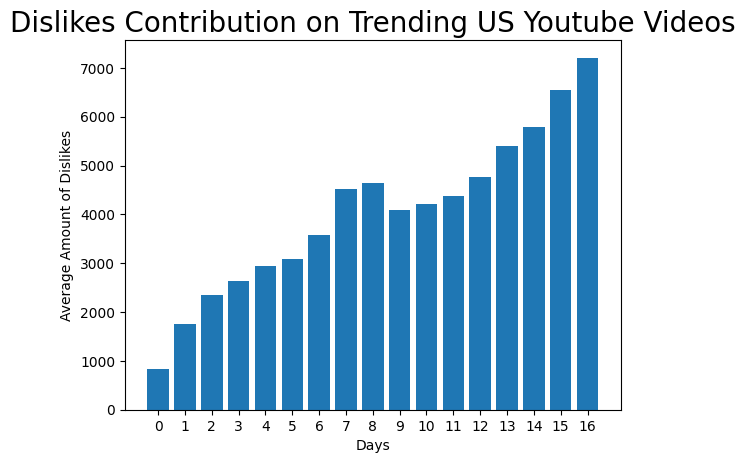

In [46]:
plt.figure()
plt.title('Dislikes Contribution on Trending US Youtube Videos', size = 20)
plt.bar(dfDislikes['days'], dfDislikes['Average Amount of Dislikes'])
plt.xlabel('Days')
plt.xticks(range(0,17))
plt.ylabel('Average Amount of Dislikes')
plt.show()

Dari grafik di atas dapat diketahui bahwa jumlah `dislikes` dari suatu video cenderung bertambah meskipun mengalami penurunan pada hari ke 9, tetapi pertambahan jumlah `dislikes` tidak sebanding dengan bertambahnya jumlah `likes` sehingga video tersebut tetap menjadi video yang trending.

### Pengaruh Jumlah `comment`

In [47]:
#Pengecekan apakah kolom `comment` terdistribusi normal

from scipy.stats import shapiro

stats, pvalue = shapiro(df3['comment_count'])
if pvalue <= 0.05:
    print ('Tidak terdistribusi normal')
else:
    print ('Terdistribusi normal')

Tidak terdistribusi normal


In [48]:
#Menampilkan statistik deskriptif pada kolom `comment_count`

df3['comment_count'].describe()

count    3.931700e+04
mean     8.225056e+03
std      3.725149e+04
min      0.000000e+00
25%      6.150000e+02
50%      1.826000e+03
75%      5.575000e+03
max      1.361580e+06
Name: comment_count, dtype: float64

Dari statistik deskriptif yang dianalisa pada tabel baru dapat diketahui bahwa rata-rata yang dimiliki oleh kolom `comment_count` adalah 8225.

In [49]:
amountOfComments = []

for i in range(0,17):
    avg = round(df3[df3['days'] == i]['comment_count'].mean())
    amountOfComments.append(avg)

dfCom = pd.DataFrame(data = amountOfComments, columns = ['Average Amount of Comments'])
dfCom['days'] = range(0,17)
dfCom

,Average Amount of Comments,days
0,2550,0
1,5437,1
2,6402,2
3,6669,3
4,6827,4
5,7056,5
6,7687,6
7,9096,7
8,9718,8
9,9927,9


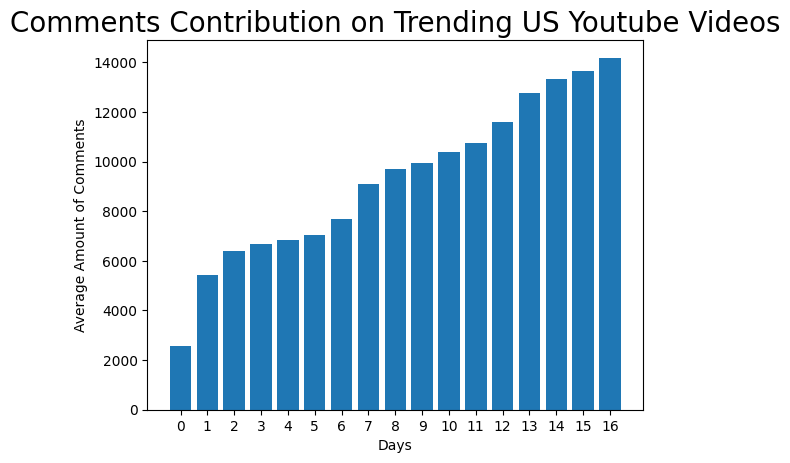

In [50]:
plt.figure()
plt.title('Comments Contribution on Trending US Youtube Videos', size = 20)
plt.bar(dfCom['days'], dfCom['Average Amount of Comments'])
plt.xlabel('Days')
plt.xticks(range(0,17))
plt.ylabel('Average Amount of Comments')
plt.show()

Dari grafik di atas dapat diketahui bahwa jumlah komentar pada suatu video makin bertambah tiap harinya, hal tersebut menunjukkan hal yang positif karena telah terjadi *engagement* baik antar penonton maupun antara penonton dengan pemilik *channel* tersebut. Apabila *engagement* dari suatu video tinggi maka kemungkinan untuk video tersebut menjadi video yang trending pun akan bertambah.

## Faktor Utama Sebuah Video Menjadi Trending

Untuk menentukan apakah faktor utama yang mempengaruhi sebuah video Youtube menjadi trending di US, maka perlu dilakukan uji korelasi.

Karena data `views`, `likes`, `dislikes`, dan `comment_count` pada dataset tersebut tidak terdistribusi normal, maka uji korelasi akan dilakukan dengan menggunakan metode Spearman.

In [51]:
#Melakukan uji korelasi Spearman

cor = df3[['views', 'likes', 'dislikes', 'comment_count']].corr(method = 'spearman')
print(cor)

                  views     likes  dislikes  comment_count
views          1.000000  0.855145  0.847930  0.800411     
likes          0.855145  1.000000  0.789769  0.873304     
dislikes       0.847930  0.789769  1.000000  0.832011     
comment_count  0.800411  0.873304  0.832011  1.000000     


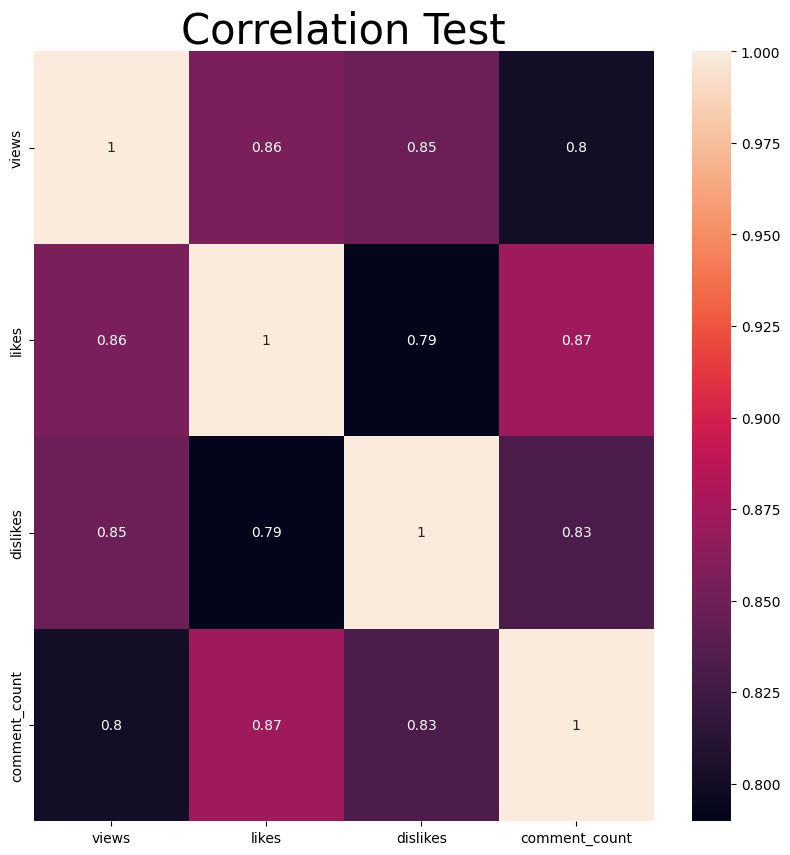

In [52]:
plt.figure(figsize=(10,10))
plt.title('Correlation Test', size = 30)
sns.heatmap(data = cor, annot = True)
plt.show()

Dari heat map di atas dapat ditarik kesimpulan bahwa urutan faktor-faktor yang mempengaruhi sebuah video menjadi trending di Youtube adalah sebagai berikut:
1. `views`
2. `likes`
3. `comment_count`
4. `dislikes` 

Hal di atas menunjukkan bahwa agar sebuah video menjadi trending dibutuhkan *engagement* yang tinggi pada video tersebut dengan cara menarik perhatian penonton agar jumlah `views` bertambah dan mengajak penonton untuk memberikan `likes` dan komentar pada video tersebut agar kemungkinan untuk video tersebut muncul di beranda seorang pengguna Youtube yang belum *subscribe* channel tersebut meningkat.

## Pengaruh Jam Tayang Terhadap Video yang Trending

In [53]:
#Pengecekan apakah kolom `showtimes` terdistribusi normal

from scipy.stats import shapiro

stats, pvalue = shapiro(df3['showtimes (hour)'])
if pvalue <= 0.05:
    print ('Tidak terdistribusi normal')
else:
    print ('Terdistribusi normal')

Tidak terdistribusi normal


Karena jumlah `views` merupakan faktor utama yang membuat sebuah video menjadi trending, mari lakukan pengecekan berapa banyak video yang menjadi trending sesuai dengan jam tayangnya. 

In [54]:
amountOfVideos = []
sumViews = []

for i in range(0,24):
    count = round(df3[df3['showtimes (hour)'] == i]['video_id'].count())
    sum = round(df3[df3['showtimes (hour)'] == i]['views'].sum())
    amountOfVideos.append(count)
    sumViews.append(sum)

dfHour = pd.DataFrame(data = amountOfVideos, columns = ['Amount of Videos'])
dfHour['Amount of Views'] = sumViews
dfHour['showtimes (hour)'] = range(0,24)
dfHour

,Amount of Videos,Amount of Views,showtimes (hour)
0,1406,2048499221,0
1,1260,2544741542,1
2,917,1799927162,2
3,925,2532186519,3
4,1174,6694022545,4
5,1233,2881310555,5
6,511,836751886,6
7,643,2428809319,7
8,770,2671272960,8
9,577,3180286151,9


In [55]:
dfHour.describe()

,Amount of Videos,Amount of Views,showtimes (hour)
count,24.000000,2.400000e+01,24.000000
mean,1638.208333,3.563725e+09,11.500000
std,940.646031,1.677938e+09,7.071068
min,511.000000,8.367519e+08,0.000000
25%,890.500000,2.333732e+09,5.750000
50%,1415.500000,3.030798e+09,11.500000
75%,2030.500000,4.781190e+09,17.250000
max,3538.000000,6.694023e+09,23.000000


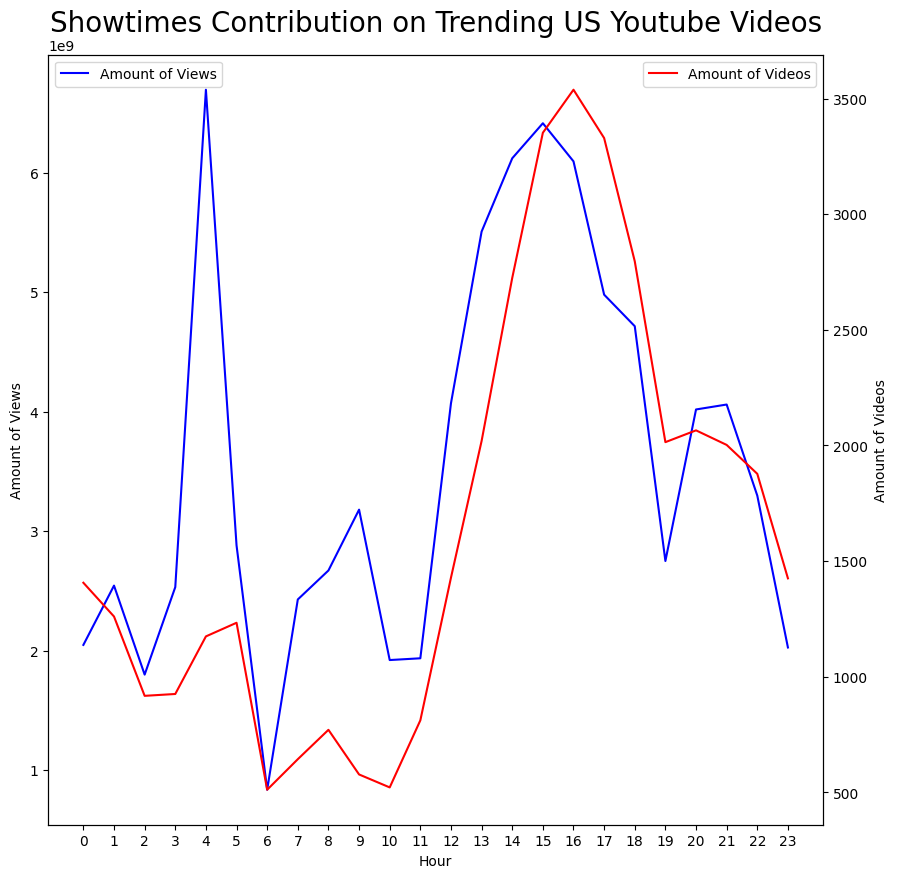

In [56]:
fig, ax1, = plt.subplots(figsize = (10,10))
ax2 = ax1.twinx()

plt.title('Showtimes Contribution on Trending US Youtube Videos', size = 20)
plt.xticks(range(0,24))

ax1.plot(dfHour['showtimes (hour)'], dfHour['Amount of Views'], color = 'blue', label = 'Amount of Views')
ax2.plot(dfHour['showtimes (hour)'], dfHour['Amount of Videos'], color = 'red', label = 'Amount of Videos')

ax1.set_xlabel('Hour')
ax1.set_ylabel('Amount of Views')

ax2.set_ylabel('Amount of Videos')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.show()

Dari grafik di atas, apabila dilihat dari `showtimes` atau jam tayang video, waktu terbaik untuk meng-*upload* video adalah sekitar pukul 14.00 hingga 18.00 waktu US karena jumlah video yang menjadi trending ketika di-*upload* pada kurun waktu tersebut relatif lebih tinggi apabila dibandingkan dengan jam tayang yang lain. Sementara apabila dilihat dari jumlah `views`, waktu terbaik untuk meng-*upload* video adalah sekitar pukul 13.00 hingga 18.00 waktu US. 

**Sehingga dapat disimpulkan bahwa waktu terbaik untuk meng-*upload* sebuah video adalah pukul 14.00 hingga 18.00 waktu US.**

Terjadi pula anomali pada pukul 04.00, dimana terdapat video yang di*upload* pada waktu tersebut menjadi trending dan memiliki jumlah `views` yang sangat banyak. Tetapi karena hal tersebut merupakan sebuah anomali maka dapat diabaikan dan tidak mempengaruhi kesimpulan yang didapat.

## Lama Waktu Sebuah Video Menjadi Trending

Dari analisa yang telah dilakukan sebelumnya, diketahui bahwa rata-rata lama waktu yang dibutuhkan agar sebuah video menjadi trending adalah 16 hari. Terdapat pula 1584 data outliers yang sudah dibersihkan sehingga sekarang jumlah data yang digunakan adalah 39317 baris.

In [57]:
df3['days'].describe()

count    39317.000000
mean     6.043187    
std      3.946646    
min      0.000000    
25%      3.000000    
50%      5.000000    
75%      8.000000    
max      18.000000   
Name: days, dtype: float64

Setelah dilakukan pembersihan, didapatkan rata-rata baru lama waktu yang dibutuhkan agar sebuah video menjadi trending adalah 6 hari.

In [58]:
amountOfVid = []

for i in range(0,19):
    sum = round(df3[df3['days'] == i]['video_id'].count())
    amountOfVid.append(sum)

dfVid = pd.DataFrame(data = amountOfVid, columns = ['Amount of Videos'])
dfVid['days'] = range(0,19)
dfVid

,Amount of Videos,days
0,121,0
1,2839,1
2,4286,2
3,4639,3
4,4680,4
5,4579,5
6,4038,6
7,3126,7
8,2184,8
9,1657,9


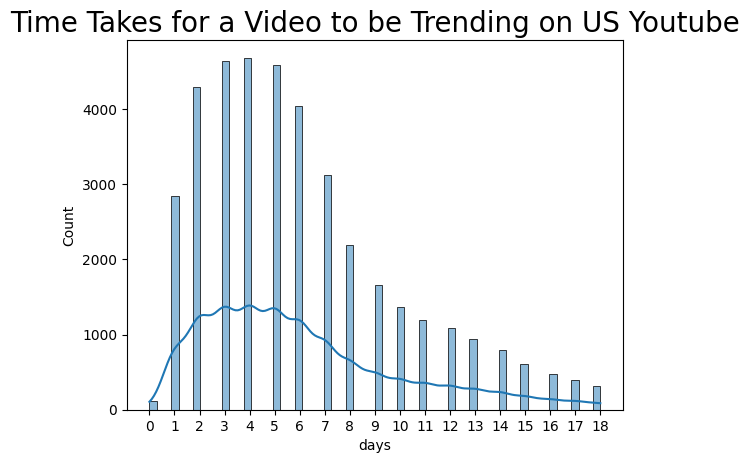

In [59]:
sns.histplot(df3['days'], kde = True)
plt.title('Time Takes for a Video to be Trending on US Youtube', size = 20)
plt.xticks(range(0,19))
plt.show()

Dari histogram di atas dapat disimpulkan bahwa waktu yang dibutuhkan untuk sebuah video menjadi trending di Youtube adalah sekitar 2 hingga 6 hari.

## Kategori Video yang Paling Diminati

In [60]:
#Menghitung jumlah video pada tiap kategori

nVidCat = df3.groupby('category')['video_id'].count().sort_values(ascending = False).reset_index().rename(columns = {'video_id' : 'Amount of Videos'})
nVidCat

,category,Amount of Videos
0,Entertainment,9560
1,Music,6105
2,Howto & Style,4025
3,Comedy,3371
4,People & Blogs,3107
5,News & Politics,2432
6,Science & Technology,2299
7,Film & Animation,2196
8,Sports,2118
9,Education,1600


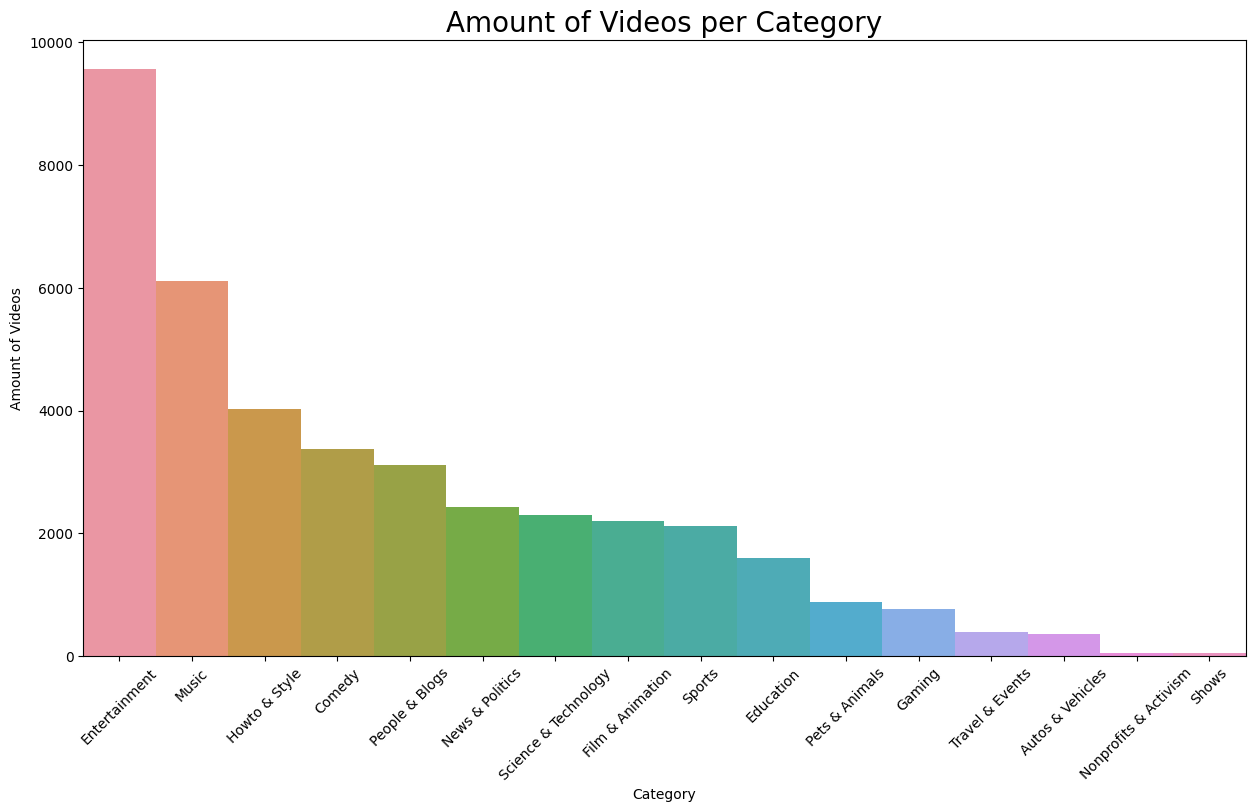

In [61]:
x = nVidCat['category']
y = nVidCat['Amount of Videos']

plt.figure(figsize = (15,8))
sns.barplot(data = nVidCat, x = 'category', y = 'Amount of Videos', ci = None, width = 1)
plt.title('Amount of Videos per Category', size = 20)
plt.xlabel('Category')
plt.xticks(rotation = 45)
plt.ylabel('Amount of Videos')
plt.show()

Dari barplot di atas diketahui bahwa 5 kategori yang paling diminati oleh pentonton Youtube di US adalah:
1. Entertainment
2. Music
3. Howto & Style
4. Comedy
5. People & Blogs

Sehingga apabila seorang Youtuber ingin membuat video yang trending, maka sebaiknya buatlah video yang sesuai dengan kelima kategori di atas.

# Kesimpulan dan Saran

## Kesimpulan

Dari hasil analisa yang telah dilakukan, maka dapat ditarik beberapa kesimpulan sebagai berikut:
1. Jumlah `views` menjadi faktor utama penentu apakah sebuah video menjadi trending atau tidak, tapi yang perlu dijadikan acuan adalah berdasarkan laman Youtube help [ini](https://support.google.com/youtube/answer/7239739?hl=en), jumlah `views` yang dijadikan pembanding adalah jumlah `views` pada channel itu sebelumnya dan bukan dibandingkan dengan channel yang lain.
2. Waktu terbaik untuk meng-*upload* sebuah video adalah pukul 14.00 hingga 18.00 waktu US.
3. Lama waktu yang dibutuhkan untuk sebuah video menjadi trending di Youtube US adalah sekitar 2 hingga 6 hari.
4. Lima (5) kategori yang paling diminati oleh penonton Youtube di Us adalah *Entertainment, Music, Howto & Style, Comedy, People & Blogs*.


## Saran

Apabila seorang Youtuber ingin video yang dibuatnya menjadi trending di Youtube US maka ia harus membuat video dengan kategori *Entertainment, Music, Howto & Style, Comedy,* atau *People & Blogs* yang menarik sehingga dapat membuat penonton Youtube menjadi penasaran dan ingin menontonnya. *Engagement* dari video tersebut juga harus diperhatikan oleh karena itu ada baiknya pada video tersebut *Youtuber* yang bersangkutan mengajak penonton untuk *subscribe, comment,* dan *like* video tersebut. Video tersebut juga ada baiknya di*upload* antara pukul 14.00 hingga 18.00 waktu US agar kemungkinan video tersebut menjadi trending meningkat.

In [62]:
df3.to_csv('USvideosCleaned.csv')